In [1]:
import numpy as np
from scipy import integrate
from scipy.optimize import minimize_scalar as minisc
from scipy import interpolate
import matplotlib.pyplot as plt

In [2]:
Tc = 12

In [3]:
kbTc = Tc*86.17
D0 = 1.76*kbTc
N0 = 1.72e4
kbTD = 37312.
def integrand1(E,D):
            return 1/np.sqrt(E**2-D**2)
Vsc = 1/(integrate.quad(integrand1,D0,kbTD,args = (D0,))[0]*N0)

def f(E,kbT):
    with np.errstate(over='raise',under='ignore'):
        try:
            return 1 / (1 + np.exp(E / kbT))
        except FloatingPointError:
            return np.exp(-E/kbT)

def D(kbT,N0,Vsc,kbTD):
    def integrandD(E,D,kbT,N0,Vsc):
        return N0*Vsc*(1-2*f(E,kbT))/np.sqrt(E**2-D**2)

    def dint(D,kbT,N0,Vsc,kbTD):
        return np.abs(integrate.quad(integrandD,D,kbTD,
                                     args = (D,kbT,N0,Vsc))[0] - 1)
    res = minisc(dint, 
                 args = (kbT,N0,Vsc,kbTD),
                method='brent',
                options = {'xtol':1e-21})
    if res.success:
        return res.x

points = 1000
Ddata = np.zeros((2,points))
i = 0
for kbT in np.logspace(np.log10(0.01),np.log10(99e-2),points)*kbTc:
    Ddata[0,i] = kbT
    Ddata[1,i] = D(kbT,N0,Vsc,kbTD)
    i += 1

C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Steven\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


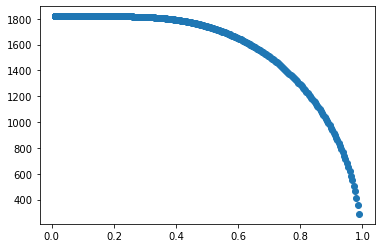

In [4]:
plt.plot(Ddata[0,:]/kbTc,Ddata[1,:],'o')
Dspl = interpolate.splrep(Ddata[0, :], Ddata[1, :])
# plt.plot(np.linspace(0,1.2,points),
#          interpolate.splev(np.linspace(0,1.2,points)*86.17,Dspl))
# plt.xlim(0,.14)
# plt.ylim(181.9910399,181.9910401)
# plt.yscale('log')

In [5]:
np.save('Ddata_Al_12',Ddata)

In [6]:
Vsc

1.565803618633812e-05